# **PMR 3508 - Aprendizado de Máquina e Reconhecimento de Padrões**

### **Exercício Programa 03:** Aplicação e comparação de 4 modelos utilizando a base de dados Adult.

Autor: Vítor Garcia Comissoli

NUSP: 11910411

Hash code: 109

Data: 09/12/2024

## **Links relevantes:**

*   Link para o GitHub: https://github.com/Vitor-Garcia-Comissoli/Codes_from_PMR3508
*   Link para a pasta do Google Drive: https://drive.google.com/drive/folders/1xQETUZHZYIxc4ms2SAU94QoTtm-IOCAq?usp=sharing

## **Input dos arquivos necessários:**

##### **Input pelo Google Drive:**
Inicialmente, deve ser criado um atalho da pasta do Google Drive (fornecida através do link anteriormente) para o Drive do usuário. Em seguida, através do código a seguir, o Google Colab é conectado ao Drive, é montada uma pasta e alterado o diretório da pasta.

##### **Input da pasta baixada localmente:**
Alternativamente, caso tenha baixado o .ipynb, estabelecer uma path para a pasta "EP01" (encontrada no repositório do GitHub).

In [1]:
'''
# Montando a pasta:
from google.colab import drive
drive.mount('/content/gdrive')

path = '/content/gdrive/My Drive/Décimo Semestre/PMR 3508/EP01'

# Descomentar essa linha, e comentar a anterior, após copiar a pasta para o drive pessoal:
# path = '/content/gdrive/My Drive/EP01'

# Descomentar essa linha, e comentar as anteriores, para usar o arquivo baixado nativamente:
# path = 'F:/Downloads/EP01'

# Alterando o diretório:
import os
os.chdir(path)

# Listando os arquivos do diretório:
!ls
'''

"\n# Montando a pasta:\nfrom google.colab import drive\ndrive.mount('/content/gdrive')\n\npath = '/content/gdrive/My Drive/Décimo Semestre/PMR 3508/EP01'\n\n# Descomentar essa linha, e comentar a anterior, após copiar a pasta para o drive pessoal:\n# path = '/content/gdrive/My Drive/EP01'\n\n# Descomentar essa linha, e comentar as anteriores, para usar o arquivo baixado nativamente:\n# path = 'F:/Downloads/EP01'\n\n# Alterando o diretório:\nimport os\nos.chdir(path)\n\n# Listando os arquivos do diretório:\n!ls\n"

In [2]:
# Instalação da biblioteca "ucimlrepo"

In [3]:
#pip install ucimlrepo

In [4]:
# Importação das bibliotecas

#!apt-get install texlive texlive-xetex texlive-latex-extra pandoc
#!pip install pypandoc
import os
import pandas as pd
import statsmodels.api as sm
from scipy.stats import mode
import sklearn as sk
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import adjusted_rand_score
import numpy as np
import matplotlib.pyplot as plt
#import ucimlrepo
import warnings
import category_encoders as ce

## **Impotando as bases de treino e teste:**

In [5]:
# Descomentar essas linhas, e comentar as próximas, para usar a base oriunda do Kaggle:

treino = pd.read_csv("/kaggle/input/adult-pmr3508/train_data.csv",
        na_values="?", names=[
        "id", "age", "workclass", "fnlwgt", "education", "education-num", "marital-status",
        "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss",
        "hours-per-week", "native-country", "income"])
treino = treino.drop(0)
drive = True

# Descomentar essas linhas, e comentar as anteriores, para usar a base oriunda da biblioteca "ucimlrepo":
"""
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split
adult = fetch_ucirepo(id=2)
df = pd.merge(adult.data.features, adult.data.targets, left_index=True, right_index=True)
df['income'] = df['income'].replace({'<=50K.': '<=50K', '>50K.': '>50K'})
treino, teste = train_test_split(df, test_size=0.3, random_state=42)
drive = False
"""
treino

,id,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
1,16280,34,Private,204991,Some-college,10,Divorced,Exec-managerial,Own-child,White,Male,0,0,44,United-States,<=50K
2,16281,58,Local-gov,310085,10th,6,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,<=50K
3,16282,25,Private,146117,Some-college,10,Never-married,Machine-op-inspct,Not-in-family,White,Male,0,0,42,United-States,<=50K
4,16283,24,Private,138938,Some-college,10,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,<=50K
5,16284,57,Self-emp-inc,258883,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,White,Male,5178,0,60,Hungary,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,48835,42,Private,384236,Masters,14,Married-civ-spouse,Prof-specialty,Husband,White,Male,7688,0,40,United-States,>50K
32557,48836,23,Private,129042,HS-grad,9,Never-married,Machine-op-inspct,Unmarried,Black,Female,0,0,40,United-States,<=50K
32558,48837,30,Private,195488,HS-grad,9,Never-married,Priv-house-serv,Own-child,White,Female,0,0,40,Guatemala,<=50K
32559,48838,18,Private,27620,HS-grad,9,Never-married,Adm-clerical,Not-in-family,White,Female,0,0,25,United-States,<=50K


In [6]:
# Descomentar essas linhas, e comentar a próxima, para usar a base oriunda do Kaggle:
teste = pd.read_csv("/kaggle/input/adult-pmr3508/test_data.csv",
        sep=r'\s*,\s*',
        engine='python',
        na_values="?", names=[
        "id", "age", "workclass", "fnlwgt", "education", "education-num", "marital-status",
        "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss",
        "hours-per-week", "native-country"], skiprows=1)

# Descomentar essa linha, e comentar as anteriores, para usar a base oriunda da biblioteca "ucimlrepo":
"""
teste
"""

teste

,id,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0,25,Private,120596,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,44,United-States
1,1,64,State-gov,152537,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States
2,2,31,Private,100135,Masters,14,Divorced,Exec-managerial,Not-in-family,White,Female,0,0,40,United-States
3,3,45,Private,189123,HS-grad,9,Never-married,Machine-op-inspct,Own-child,White,Male,0,0,40,United-States
4,4,64,Self-emp-inc,487751,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,50,United-States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16275,16275,40,Private,168113,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States
16276,16276,30,Local-gov,327203,HS-grad,9,Married-civ-spouse,Other-service,Husband,White,Male,0,0,40,United-States
16277,16277,25,Private,116358,HS-grad,9,Never-married,Adm-clerical,Own-child,Asian-Pac-Islander,Male,0,0,40,Philippines
16278,16278,60,Private,39263,Masters,14,Never-married,Exec-managerial,Not-in-family,White,Female,3325,0,35,United-States


## **Análise Descritiva**:

Uma breve análise descritiva (com tabelas e gráficos) da base de treino.

In [7]:
treino["native-country"].value_counts()

native-country
United-States                 29169
Mexico                          643
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                           29
Greece       

<Axes: xlabel='age'>

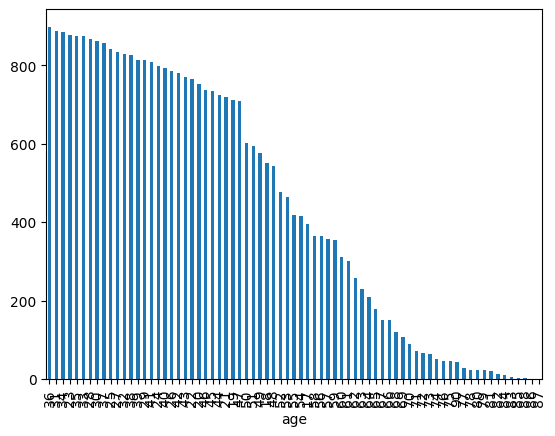

In [8]:
treino["age"].value_counts().plot(kind="bar")

In [9]:
"""
plt.figure(figsize=(10, 6))
plt.boxplot(treino["age"], patch_artist=True)
plt.ylabel('age')
plt.show()
"""

'\nplt.figure(figsize=(10, 6))\nplt.boxplot(treino["age"], patch_artist=True)\nplt.ylabel(\'age\')\nplt.show()\n'

<Axes: xlabel='sex'>

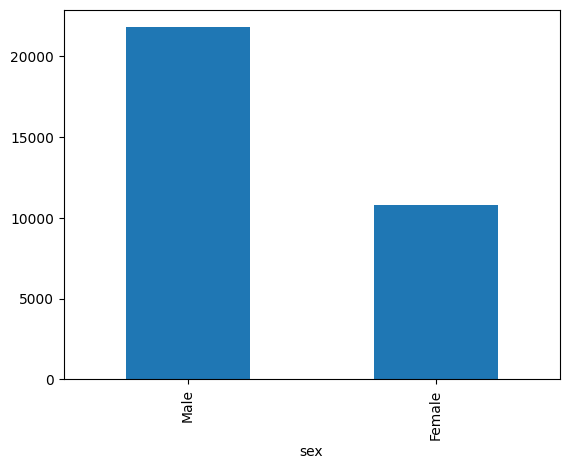

In [10]:
treino["sex"].value_counts().plot(kind="bar")

<Axes: xlabel='race'>

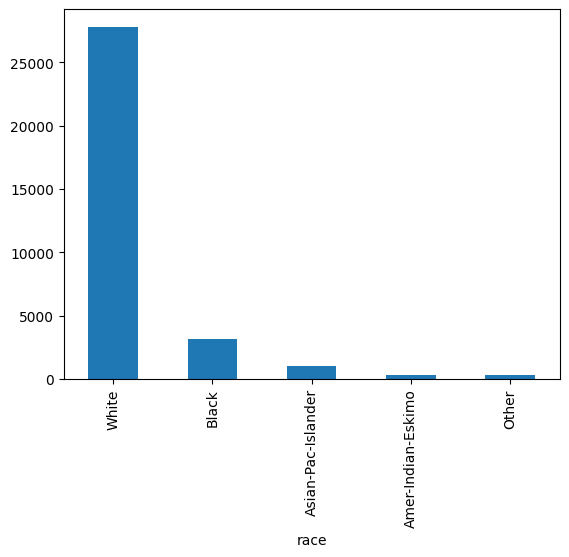

In [11]:
treino["race"].value_counts().plot(kind="bar")

<Axes: xlabel='workclass'>

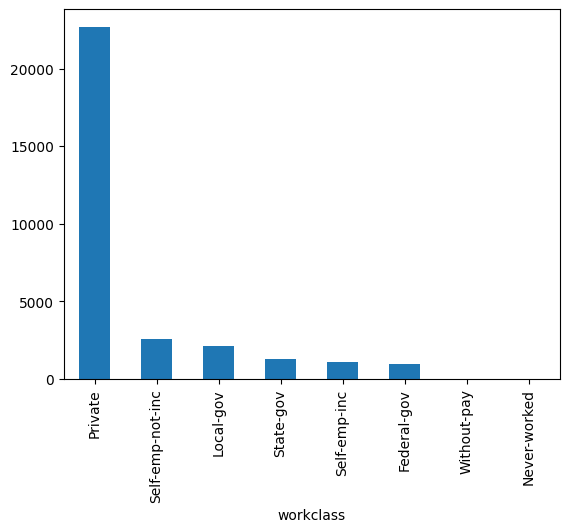

In [12]:
treino["workclass"].value_counts().plot(kind="bar")

<Axes: xlabel='education'>

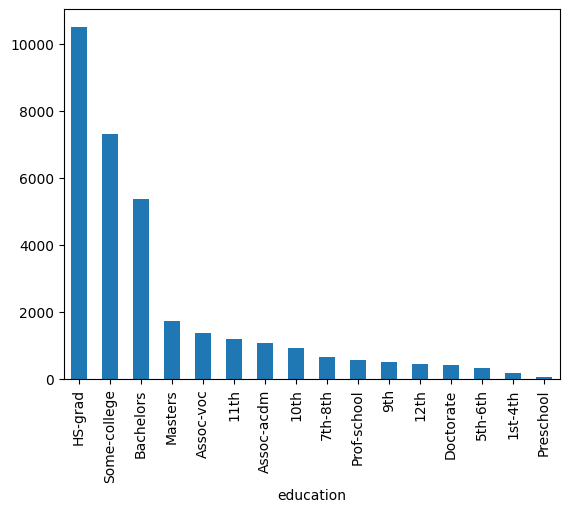

In [13]:
treino["education"].value_counts().plot(kind="bar")

<Axes: xlabel='occupation'>

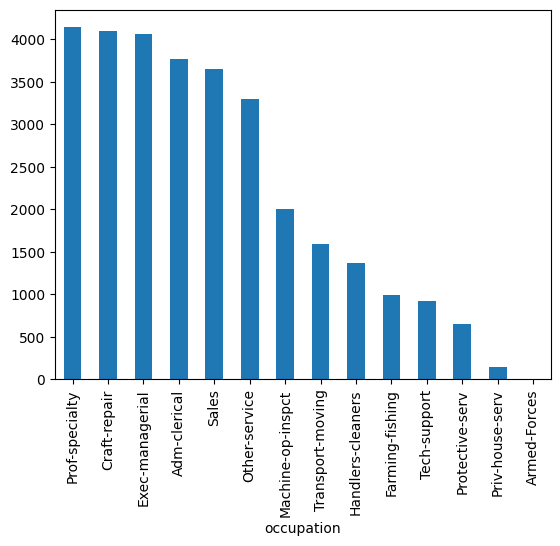

In [14]:
treino["occupation"].value_counts().plot(kind="bar")

<Axes: xlabel='marital-status'>

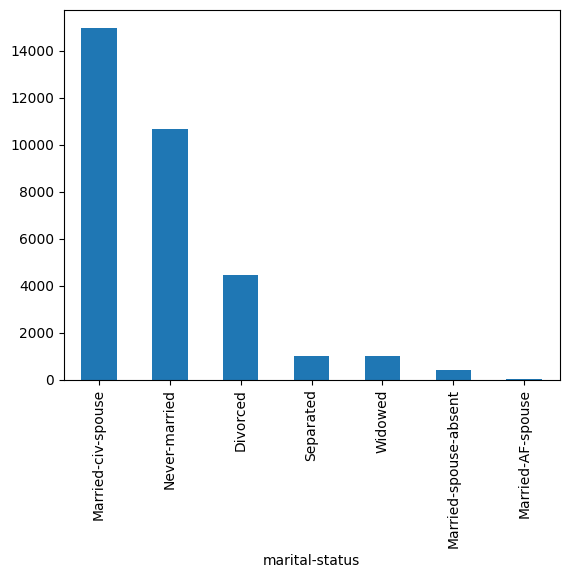

In [15]:
treino["marital-status"].value_counts().plot(kind="bar")

<Axes: xlabel='relationship'>

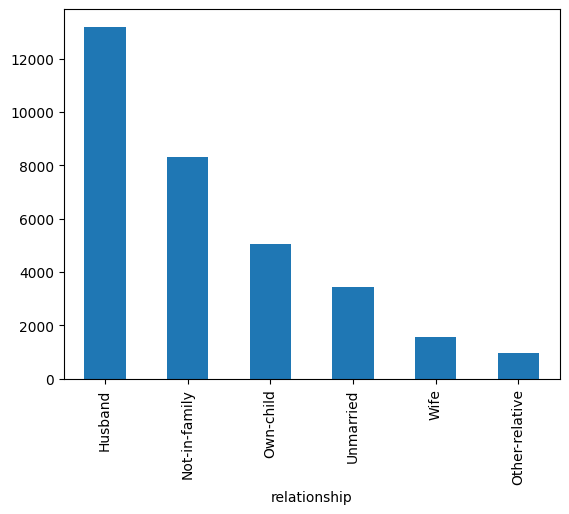

In [16]:
treino["relationship"].value_counts().plot(kind="bar")

<Axes: xlabel='capital-gain'>

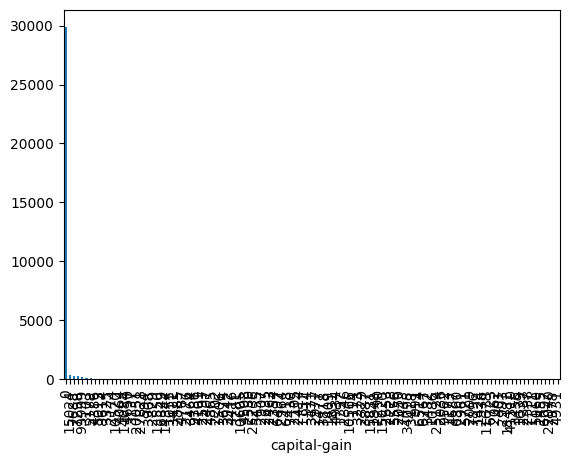

In [17]:
treino["capital-gain"].value_counts().plot(kind="bar")

In [18]:
'''
plt.figure(figsize=(10, 6))
plt.boxplot(treino["capital-gain"], patch_artist=True)
plt.ylabel('capital-gain')
plt.show()
'''

'\nplt.figure(figsize=(10, 6))\nplt.boxplot(treino["capital-gain"], patch_artist=True)\nplt.ylabel(\'capital-gain\')\nplt.show()\n'

<Axes: xlabel='capital-loss'>

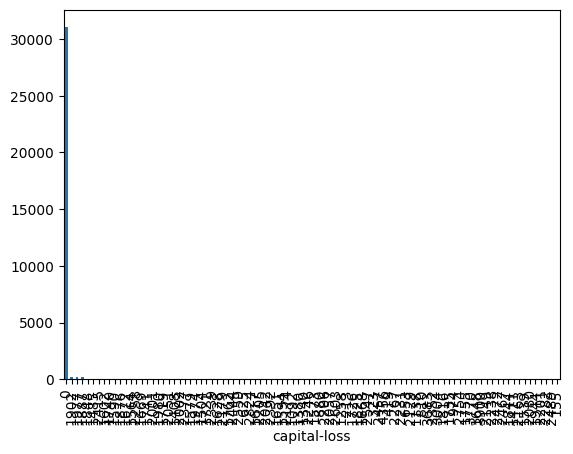

In [19]:
treino["capital-loss"].value_counts().plot(kind="bar")

In [20]:
'''
plt.figure(figsize=(10, 6))
plt.boxplot(treino["capital-loss"], patch_artist=True)
plt.ylabel('capital-loss')
plt.show()
'''

'\nplt.figure(figsize=(10, 6))\nplt.boxplot(treino["capital-loss"], patch_artist=True)\nplt.ylabel(\'capital-loss\')\nplt.show()\n'

<Axes: xlabel='hours-per-week'>

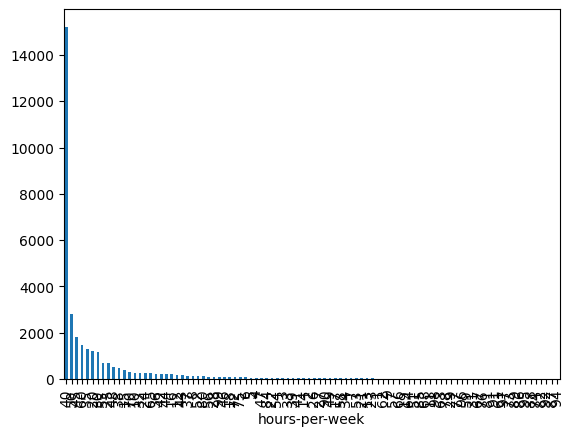

In [21]:
treino["hours-per-week"].value_counts().plot(kind="bar")

In [22]:
'''
plt.figure(figsize=(10, 6))
plt.boxplot(treino["hours-per-week"], patch_artist=True)
plt.ylabel('hours-per-week')
plt.show()
'''

'\nplt.figure(figsize=(10, 6))\nplt.boxplot(treino["hours-per-week"], patch_artist=True)\nplt.ylabel(\'hours-per-week\')\nplt.show()\n'

Observa-se que as variáveis acima apresentam uma variância muito alta, além de uma altíssima presença de outliers (como apresentado nos plots acima), portanto o uso delas nas predições deve ser analizado com cuidado.

<Axes: xlabel='income'>

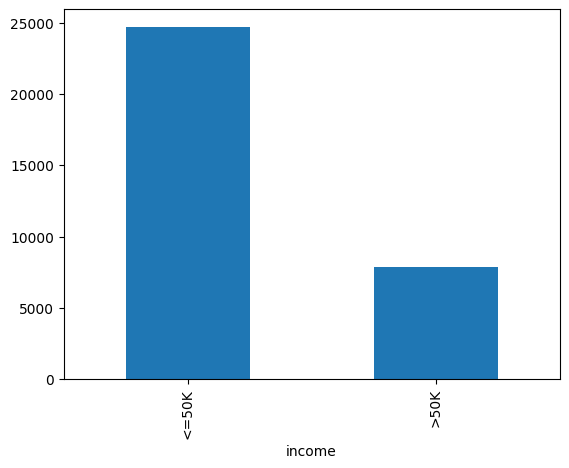

In [23]:
treino["income"].value_counts().plot(kind="bar")

In [24]:
(treino["income"].value_counts())/len(treino["income"])*100

income
<=50K    75.918305
>50K     24.081695
Name: count, dtype: float64

Observa-se acima a porcentagem que cada uma das categorias da variável income representam na base de treino.

## **Lidando com os dados faltantes:**

Serão geradas duas novas bases de dados, onde na primeira serão retiradas todas as linhas que contém NA, e na segundo, os valores de NA serão substituidos pela média (ou moda, no caso de variáveis categóricas).

In [25]:
# Defininfo função que subistitui NAs diferentemente, dependendo do tipo da variável de cada coluna.
def fill_na_with_mean_or_mode(df):
    for col in df.columns:
        if pd.api.types.is_numeric_dtype(df[col]):
            # Replace NaN in numeric columns with the mean
            df.fillna({col: df[col].mean()}, inplace=True)
        else:
            # Replace NaN in non-numeric columns with the mode (most frequent value)
            df.fillna({col: df[col].mode()[0]}, inplace=True)
    return df

In [26]:
# Retirada de "Holand-Netherlands", por estar somente na base de treino, e não na de teste.

treino["native-country"] = treino["native-country"].replace("Holand-Netherlands",np.nan)
teste["native-country"] = teste["native-country"].replace("Holand-Netherlands",np.nan)

In [27]:
treino_1 = treino.dropna()
treino_2 = fill_na_with_mean_or_mode(treino)

In [28]:
treino.shape

(32560, 16)

In [29]:
treino_1.shape

(30160, 16)

In [30]:
treino_2.shape

(32560, 16)

In [31]:
treino_1

,id,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
1,16280,34,Private,204991,Some-college,10,Divorced,Exec-managerial,Own-child,White,Male,0,0,44,United-States,<=50K
2,16281,58,Local-gov,310085,10th,6,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,<=50K
3,16282,25,Private,146117,Some-college,10,Never-married,Machine-op-inspct,Not-in-family,White,Male,0,0,42,United-States,<=50K
4,16283,24,Private,138938,Some-college,10,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,<=50K
5,16284,57,Self-emp-inc,258883,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,White,Male,5178,0,60,Hungary,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,48835,42,Private,384236,Masters,14,Married-civ-spouse,Prof-specialty,Husband,White,Male,7688,0,40,United-States,>50K
32557,48836,23,Private,129042,HS-grad,9,Never-married,Machine-op-inspct,Unmarried,Black,Female,0,0,40,United-States,<=50K
32558,48837,30,Private,195488,HS-grad,9,Never-married,Priv-house-serv,Own-child,White,Female,0,0,40,Guatemala,<=50K
32559,48838,18,Private,27620,HS-grad,9,Never-married,Adm-clerical,Not-in-family,White,Female,0,0,25,United-States,<=50K


In [32]:
treino_2

,id,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
1,16280,34,Private,204991,Some-college,10,Divorced,Exec-managerial,Own-child,White,Male,0,0,44,United-States,<=50K
2,16281,58,Local-gov,310085,10th,6,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,<=50K
3,16282,25,Private,146117,Some-college,10,Never-married,Machine-op-inspct,Not-in-family,White,Male,0,0,42,United-States,<=50K
4,16283,24,Private,138938,Some-college,10,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,<=50K
5,16284,57,Self-emp-inc,258883,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,White,Male,5178,0,60,Hungary,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,48835,42,Private,384236,Masters,14,Married-civ-spouse,Prof-specialty,Husband,White,Male,7688,0,40,United-States,>50K
32557,48836,23,Private,129042,HS-grad,9,Never-married,Machine-op-inspct,Unmarried,Black,Female,0,0,40,United-States,<=50K
32558,48837,30,Private,195488,HS-grad,9,Never-married,Priv-house-serv,Own-child,White,Female,0,0,40,Guatemala,<=50K
32559,48838,18,Private,27620,HS-grad,9,Never-married,Adm-clerical,Not-in-family,White,Female,0,0,25,United-States,<=50K


Analogamente ao caso anterior, temos:

In [33]:
teste_1 = teste.dropna()
teste_2 = fill_na_with_mean_or_mode(teste)

In [34]:
teste.shape

(16280, 15)

In [35]:
teste_1.shape

(15059, 15)

In [36]:
teste_2.shape

(16280, 15)

In [37]:
teste_1

,id,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0,25,Private,120596,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,44,United-States
1,1,64,State-gov,152537,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States
2,2,31,Private,100135,Masters,14,Divorced,Exec-managerial,Not-in-family,White,Female,0,0,40,United-States
3,3,45,Private,189123,HS-grad,9,Never-married,Machine-op-inspct,Own-child,White,Male,0,0,40,United-States
4,4,64,Self-emp-inc,487751,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,50,United-States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16275,16275,40,Private,168113,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States
16276,16276,30,Local-gov,327203,HS-grad,9,Married-civ-spouse,Other-service,Husband,White,Male,0,0,40,United-States
16277,16277,25,Private,116358,HS-grad,9,Never-married,Adm-clerical,Own-child,Asian-Pac-Islander,Male,0,0,40,Philippines
16278,16278,60,Private,39263,Masters,14,Never-married,Exec-managerial,Not-in-family,White,Female,3325,0,35,United-States


In [38]:
teste_2

,id,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0,25,Private,120596,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,44,United-States
1,1,64,State-gov,152537,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States
2,2,31,Private,100135,Masters,14,Divorced,Exec-managerial,Not-in-family,White,Female,0,0,40,United-States
3,3,45,Private,189123,HS-grad,9,Never-married,Machine-op-inspct,Own-child,White,Male,0,0,40,United-States
4,4,64,Self-emp-inc,487751,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,50,United-States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16275,16275,40,Private,168113,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States
16276,16276,30,Local-gov,327203,HS-grad,9,Married-civ-spouse,Other-service,Husband,White,Male,0,0,40,United-States
16277,16277,25,Private,116358,HS-grad,9,Never-married,Adm-clerical,Own-child,Asian-Pac-Islander,Male,0,0,40,Philippines
16278,16278,60,Private,39263,Masters,14,Never-married,Exec-managerial,Not-in-family,White,Female,3325,0,35,United-States


Como existem valores para as variáveis "District", "Latitude" e "Longitude" que estão presentes na base de testes, mas não estão presentes na base de treino, e vice versa, optou-se por retirá-las da modelagem dos modelos, para viabilizar o cálculo das predições de cada modelo.

In [39]:
X1 = treino_1.drop(columns=['income', "id"])
y1 = treino_1['income']

X2 = treino_2.drop(columns=['income', "id"])
y2 = treino_2['income']

In [40]:
y1 = y1.replace("<=50K", 0)
y1 = y1.replace(">50K", 1)

y2 = y2.replace("<=50K", 0)
y2 = y2.replace(">50K", 1)

/tmp/ipykernel_17/2284245459.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y1 = y1.replace(">50K", 1)
/tmp/ipykernel_17/2284245459.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y2 = y2.replace(">50K", 1)


In [41]:
X1_prev = teste_1.drop(columns=["id"])
X2_prev = teste_2.drop(columns=["id"])

In [42]:
X1_transformed = pd.get_dummies(X1, columns=["native-country", "sex", "race", "relationship", "occupation", "marital-status", "education", "workclass"], drop_first=False)
X2_transformed = pd.get_dummies(X2, columns=["native-country", "sex", "race", "relationship", "occupation", "marital-status", "education", "workclass"], drop_first=False)
X1_prev_transformed = pd.get_dummies(X1_prev, columns=["native-country", "sex", "race", "relationship", "occupation", "marital-status", "education", "workclass"], drop_first=False)
X2_prev_transformed = pd.get_dummies(X2_prev, columns=["native-country", "sex", "race", "relationship", "occupation", "marital-status", "education", "workclass"], drop_first=False)

In [43]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1_transformed, y1, test_size=0.3, random_state=42)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2_transformed, y2, test_size=0.3, random_state=42)

## **Modelo 1: Regressão Logística**

In [44]:
model1 = LogisticRegression()
model2 = LogisticRegression()

In [45]:
scores_log1 = pd.DataFrame(cross_val_score(model1, X1_train, y1_train, cv=10))
scores_log2 = pd.DataFrame(cross_val_score(model2, X2_train, y2_train, cv=10))

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [46]:
scores_log1

,0
0,0.794981
1,0.782670
2,0.784462
3,0.800095
4,0.785883
5,0.791568
6,0.779252
7,0.787305
8,0.789199
9,0.795358


In [47]:
scores_log2

,0
0,0.793860
1,0.805702
2,0.799473
3,0.797280
4,0.798157
5,0.794647
6,0.792892
7,0.804739
8,0.780167
9,0.807810


In [48]:
model1.fit(X1_train, y1_train)
model2.fit(X2_train, y2_train)

LogisticRegression()

Seguem abaixo os $R^2$s de ambos os modelos

In [49]:
model1.score(X1_train, y1_train)

0.7895983327017809

In [50]:
model2.score(X2_train, y2_train)

0.7975166725166725

Disso, observou-se um desempenho pior retirando valores nulos que subistituindo-os pela média. Realizou-se então a predição utilizando o segundo modelo.

In [51]:
y_pred2 = model2.predict(X2_prev_transformed)

In [52]:
y_pred2 = pd.Series(y_pred2, index=X2_prev_transformed.index)

In [53]:
y_pred2 = pd.DataFrame(y_pred2)
y_pred2 = y_pred2.replace(0, "<=50K")
y_pred2 = y_pred2.replace(1, ">50K")
y_pred2

,0
0,<=50K
1,<=50K
2,<=50K
3,<=50K
4,<=50K
...,...
16275,<=50K
16276,<=50K
16277,<=50K
16278,>50K


In [54]:
y_pred2_test = model2.predict(X2_test)

## **Modelo 2: Regressão Lasso**

In [55]:
model_lasso1 = LogisticRegression(penalty='l1', solver='liblinear', C=1.0)
model_lasso2 = LogisticRegression(penalty='l1', solver='liblinear', C=1.0)

In [56]:
scores_lasso1 = pd.DataFrame(cross_val_score(model_lasso1, X1_train, y1_train, cv=10))
scores_lasso2 = pd.DataFrame(cross_val_score(model_lasso2, X2_train, y2_train, cv=10))

In [57]:
scores_lasso1

,0
0,0.839962
1,0.844223
2,0.835149
3,0.840360
4,0.842729
5,0.851255
6,0.852203
7,0.842729
8,0.854098
9,0.846992


In [58]:
scores_lasso2

,0
0,0.859211
1,0.856140
2,0.843352
3,0.852567
4,0.852128
5,0.847301
6,0.846863
7,0.857394
8,0.838526
9,0.846863


In [59]:
model_lasso1.fit(X1_train, y1_train)
model_lasso2.fit(X2_train, y2_train)

LogisticRegression(penalty='l1', solver='liblinear')

Seguem abaixo os $R^2$s de ambos os modelos

In [60]:
model_lasso1.score(X1_train, y1_train)

0.8460117468738159

In [61]:
model_lasso2.score(X2_train, y2_train)

0.8516584766584766

Disso, observou-se um desempenho pior retirando valores nulos que subistituindo-os pela média. Realizou-se então a predição utilizando o segundo modelo.

In [62]:
y_pred_lasso2 = model_lasso2.predict(X2_prev_transformed)

In [63]:
y_pred_lasso2 = pd.Series(y_pred_lasso2, index=X2_prev_transformed.index)

In [64]:
y_pred_lasso2 = pd.DataFrame(y_pred_lasso2)
y_pred_lasso2 = y_pred_lasso2.replace(0, "<=50K")
y_pred_lasso2 = y_pred_lasso2.replace(1, ">50K")
y_pred_lasso2

,0
0,<=50K
1,>50K
2,<=50K
3,<=50K
4,>50K
...,...
16275,<=50K
16276,<=50K
16277,<=50K
16278,<=50K


In [65]:
y_pred_lasso2_test = model_lasso2.predict(X2_test)

## **Modelo 3: Random Forest**

In [66]:
rf1 = RandomForestClassifier()
rf2 = RandomForestClassifier()

In [67]:
scores_rf1 = pd.DataFrame(cross_val_score(rf1, X1_train, y1_train, cv=10))
scores_rf2 = pd.DataFrame(cross_val_score(rf2, X2_train, y2_train, cv=10))

In [68]:
scores_rf1

,0
0,0.842330
1,0.827652
2,0.840834
3,0.851729
4,0.842729
5,0.845571
6,0.865940
7,0.845097
8,0.856940
9,0.852203


In [69]:
scores_rf2

,0
0,0.864474
1,0.855702
2,0.848179
3,0.855200
4,0.848618
5,0.856516
6,0.859149
7,0.856516
8,0.846863
9,0.845546


In [70]:
rf1.fit(X1_train, y1_train)
rf2.fit(X2_train, y2_train)

RandomForestClassifier()

Seguem abaixo os $R^2$s de ambos os modelos

In [71]:
rf1.score(X1_train, y1_train)

0.9999526335733232

In [72]:
rf2.score(X2_train, y2_train)

0.999956124956125

Disso, observou-se um desempenho pior retirando valores nulos que subistituindo-os pela média (mesmo que a diferença tenha sido pequena). Realizou-se então a predição utilizando o segundo modelo.

In [73]:
y_pred_rf2 = rf2.predict(X2_prev_transformed)

In [74]:
y_pred_rf2 = pd.Series(y_pred_rf2, index=X2_prev_transformed.index)

In [75]:
y_pred_rf2 = pd.DataFrame(y_pred_rf2)
y_pred_rf2 = y_pred_rf2.replace(0, "<=50K")
y_pred_rf2 = y_pred_rf2.replace(1, ">50K")
y_pred_rf2

,0
0,<=50K
1,>50K
2,>50K
3,<=50K
4,>50K
...,...
16275,<=50K
16276,<=50K
16277,<=50K
16278,<=50K


In [76]:
y_pred_rf2_test = rf2.predict(X2_test)

## **Modelo 4: KMeans**

In [77]:
kmeans1 = KMeans(n_clusters = 2, random_state=42)
kmeans2 = KMeans(n_clusters = 2, random_state=42)

In [78]:
scores_kmeans1 = pd.DataFrame(cross_val_score(kmeans1, X1_train, y1_train, cv=10))
scores_kmeans2 = pd.DataFrame(cross_val_score(kmeans2, X2_train, y2_train, cv=10))

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

In [79]:
scores_kmeans1

,0
0,-1.010914e+13
1,-9.943920e+12
2,-1.029434e+13
3,-9.240055e+12
4,-1.029903e+13
5,-8.636794e+12
6,-1.025613e+13
7,-1.074900e+13
8,-8.972499e+12
9,-1.122020e+13


In [80]:
scores_kmeans2

,0
0,-1.002078e+13
1,-1.068038e+13
2,-1.076320e+13
3,-1.091783e+13
4,-1.047730e+13
5,-1.009962e+13
6,-9.470623e+12
7,-1.170096e+13
8,-1.074473e+13
9,-1.047134e+13


In [81]:
kmeans1.fit(X1_train, y1_train)
kmeans2.fit(X2_train, y2_train)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2, random_state=42)

As acurácias do ajuste de Rand (que vão de -1 a 1) obtidas para os modelos foram as seguintes:

In [82]:
adjusted_rand_score(y1_train, kmeans1.labels_)

-0.008272031223220906

In [83]:
adjusted_rand_score(y2_train, kmeans2.labels_)

-0.005981608885465483

Como definição temos que, para observar a qualidade de um modelo seguindo a acurácia de ajuste de Rand:

- Valores = 1: Os agrupamentos são idênticos aos rótulos reais.
- Valores = 0: O agrupamento não é melhor do que uma atribuição aleatória.
- Valores negativos: O agrupamento é pior que uma atribuição aleatória.

Disso, observou-se um modelo mal ajustado para ambas as bases, onde o agrupamento por KMeans se mostrou praticamente tão eficaz quanto uma atribuição aleatória de rótulos. Realizou-se então a predição utilizando o segundo modelo, já que esse se mostrou um pouco menos pior (por mais que ainda seja ruim).

In [84]:
y_pred_kmeans2 = kmeans2.predict(X2_prev_transformed)

In [85]:
y_pred_kmeans2 = pd.Series(y_pred_kmeans2, index=X2_prev_transformed.index)

In [86]:
y_pred_kmeans2 = pd.DataFrame(y_pred_kmeans2)
y_pred_kmeans2 = y_pred_kmeans2.replace(0, "<=50K")
y_pred_kmeans2 = y_pred_kmeans2.replace(1, ">50K")
y_pred_kmeans2

,0
0,>50K
1,>50K
2,>50K
3,>50K
4,<=50K
...,...
16275,>50K
16276,<=50K
16277,>50K
16278,>50K


In [87]:
y_pred_kmeans2_test = kmeans2.predict(X2_test)

## Escolha do Modelo Final

Para comparar esses 4 modelos entre sí, se usará o Erro Quadrático Médio (EQM) de cada um, como calculado abaixo:

In [88]:
mse_log = mean_squared_error(y2_test, y_pred2_test)
mse_lasso = mean_squared_error(y2_test, y_pred_lasso2_test)
mse_rf = mean_squared_error(y2_test, y_pred_rf2_test)
mse_kmeans = mean_squared_error(y2_test, y_pred_kmeans2_test)

print("EQM para a Regressão Logística:", mse_log)
print("EQM para a Regressão LASSO:", mse_lasso)
print("EQM para Random Forest:", mse_rf)
print("EQM para KMeans:", mse_kmeans)

EQM para a Regressão Logística: 0.20167895167895167
EQM para a Regressão LASSO: 0.14905814905814907
EQM para Random Forest: 0.1469082719082719
EQM para KMeans: 0.6139434889434889


Dados os 4 modelos gerados anteriormente, optou-se pela escolha do modelo 3 (Random Forest) como o modelo final, uma vez que o EQM do mesmo se mostrou próximo ao EQM da regressão Lasso, além de menor que o EQM da regressão Logística e muito menor que o EQM de KMeans.

Como os EQMs dos 2 modelos do meio (Random Forest e regressão Lasso) estão muito próximos um do outro, e o valor de $R^2$ oriundo do modelo de Random Forest se mostrou muito superior ao valor obtidos pela regressão Lasso, decidiu-se usar esse modelo como o modelo final.

Vale ressaltar que o modelo de KMeans apresentou o pior resultado dentre todos, por uma grande margem (observando tanto a acurácia do ajuste de Rand quanto o EQM), enquanto os dois modelos de regressão (Logística e Lasso) se mostraram um pouco menos eficientes (Quanto ao $R^2$) que o de Random Forest para essa base de dados.

## Exportando a previsão do Modelo Final para .CSV

In [89]:
# Escolha qual modelo exportar para o .CSV (por default está o modelo final escolhido, por Random Forest)

#predictions = y_pred2.copy()
#predictions = y_pred_lasso2.copy()
predictions = y_pred_rf2.copy()
#predictions = y_pred_kmeans2.copy()

predictions = pd.merge(teste["id"], predictions, left_index=True, right_index=True)
predictions = predictions.rename(columns={0: 'income'})
predictions['income'] = predictions['income'].replace({0: '<=50K', 1: '>50K'})

In [90]:
predictions

,id,income
0,0,<=50K
1,1,>50K
2,2,>50K
3,3,<=50K
4,4,>50K
...,...,...
16275,16275,<=50K
16276,16276,<=50K
16277,16277,<=50K
16278,16278,<=50K


In [91]:
predictions.to_csv('/kaggle/working/submission.csv', index = False)